<a href="https://colab.research.google.com/github/radhika3131/Deep_Learning_with_Python/blob/main/ch_07_Intruduction_to_deep_learning_for_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convnets

The following listing shows what a basic convnet looks like. It's a stack of *Conv* and *MaxPooling2D layers*. You'll see in a minute exactly what they do. We'll build the model using the *Functional API*, which we introduced in the previous chapter.

**Installing a small convnet**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) # this will give output in the form of rant--3 tensors(3D) , now we need to feed this output to a classifer vectors which are 1D such as dense layer .
x = layers.Flatten()(x) # So t convert 3d output into 1d we used flatten layer before adding dense layer
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

 NOTE: a convent takes as input tensors of shape (image height , image width , image channels) , not including batch dimension

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

You can see the output of Conv2D and Maxpooling2D layer is a rank-3 tensor of shape(height , width , channels) . THe width and height are tend to shrink as we gop deper into the model. The numner of channels is controlled by the\\first argument passed to the Conv2D(32,64 or 128).
after the last Con2D layer , we end up with n output of shape(3,3,128).
Next step is to feed output to densly connected vectors .Thes  classifer vectors which are 1D whereas output is rant-3 tensor .So to convert 3d output into 1d we used flatten layer before adding dense layer .

Finally we do 10 ways classification so our last layer has 10 outputs and a softmax activation.

Now lets train the convnets on MNIST dataset.

**Training the convnet on MNIST dataset**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 16s 4ms/step - loss: 0.1556 - accuracy: 0.9515
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0443 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0179 - accuracy: 0.9944


**Evaluating the convnt**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9920
Test accuracy: 0.992


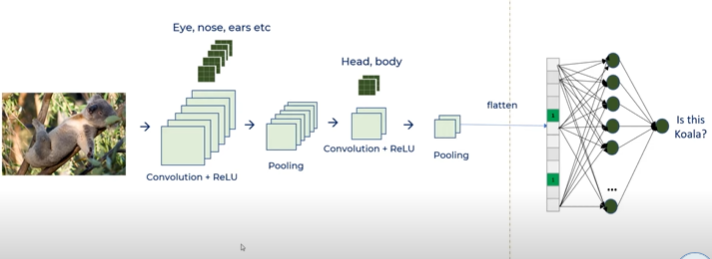

#The Convolutional operation

The fundamental difference between a densely connected layer and a convolution laver is this Dense layers learn global patterns in their input feature space (for exam ple, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns

This key characteristic gives two intresting properties:
1. the pattern they learn are translation-invariant
2.they can learn spatial hieararchies of patterns


Convolutional are defined by two key parameters:
1. Size of patches extracted from the inputs
2. Depth of the output feature map

Note: That the output width and height may differ from the input width and height for two reasons:
1. Border effect , which can be countered by padding the input feature map
2. The use of strides



**Understanding Border effects and padding**

Consider a 5*5 feature map (25 tiles total) . There are only 9 tiles around which you can centre a 3*3 window, forming 3*3 grid, hense the output feature map will be 3*3. It shrinks a little.

If we want to get an output feature map with the same spatial dimension as the input feature map , we can use padding .
padding consists of adding an appropriate number of rows and coulumns on each side of the input feature map so as to make it possible to fit centre convolutional windows around every input file.



**Understanding Convolutional stride**

 The distance between two successive windows is a paramter of the convolution, called as its strides , which is by default is 1 .

**The max pooling operation**

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel. A big difference from convolution is that max pooling is usually done with 2*2 windows , and stride 2 , in order to downsample the feature maps by a factor of 2. On the other hand  , convolutional is typically done with 3*3 windows and no stride(stride 1)


**An Incorrectly structured convet missing its max pooling layers**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

#**Training a convnet from scratch on a small dataset**

**Downloading the data**

Now upload the kaggle.json file

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radhikaramsen","key":"93cb62c99c340787605f80117247ce36"}'}

Install kaggle API client

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


kaggle API client expects the file to be in ~/.kaggle

so move it there

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

we need to set permissions

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

list all available datasets

In [ ]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          34902        961  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           4910        139  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           6881        145  1.0              
mohithsairamreddy/salary-data 

download the dataset

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:10<00:00, 105MB/s]
100% 812M/812M [00:10<00:00, 84.1MB/s]


If your file is a zip file you can unzip with the following code

In [ ]:
!unzip -qq /content/dogs-vs-cats.zip


In [ ]:
!unzip -qq /content/train.zip

After downloading the data we will uncompress it , we will create a new dataset containing three subsets:
1. training set with 1000 samples from each class(cat and dog)
2. validation set with 500 samples from each class
3. test set with 1000 sample from each class

**Copying images to training , validation and test dataset**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("cats_vs_dogs_smalldataset")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

#Building the model

we are dealing with bigger images and a more complex problem , we will make our model more larger ;It will have two more Conv2D and Maxpooling2D stages.This further reduces the size of the feature map so they are not overly large when we reach the *Flatten Layer*.

Note:
The depth of the feature maps progressively increases in the model (from 32 to 255) and the size of the feature map decreases(from 80*80 to 7*7)

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3)) #The model expect RGB images of size 180*180
x = layers.Rescaling(1./255)(inputs) # rescale input to [0,1] range by dividing them by 255
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [ ]:
model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

#Data Preprocessing

data should be formatted into appropriately preprocessed floating- point tensors before being fed into the model. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the model are roughly as follows:

1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Resize them to a shared size (we'll use 180 x 180).

5 Pack them into batches (we'll use batches of 32 images).


In particular, Keras features the utility function image dataset from directory(), which lets you quickly set up a data pipeline that can automatically turn image files on disk into batches of preprocessed tensors.

Calling image_dataset from directory (directory) will first list the subdirecto- ries of directory and assume each one contains images from one of our classes. It will then index the image files in each subdirectory. Finally, it will create and return a tf.data.Dataset object configured to read these files, shuffle them, decode them to tensors, resize them to a shared size, and pack them into batches.

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using dataset**

we will use a *ModelCheckpoint*  call back to save the model after each epoch .
We will configure it with the path specfying where to save the file , as well as the argument save_best_only = True and monitor = "val_loss": they tell the callback to only save a new file when the current value of the val_loss metric is lower than at any previous time during training.
This gurantees that your saved file will always contain the sate of the model corresponding to its best performing training epoch . Aa a result we won't have to retrain a new model for a lower no. of epoches if we start overfitting

---



In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 9s 78ms/step - loss: 0.7033 - accuracy: 0.5245 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 81ms/step - loss: 0.7077 - accuracy: 0.5350 - val_loss: 0.6815 - val_accuracy: 0.5360
Epoch 3/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6816 - accuracy: 0.5740 - val_loss: 0.6485 - val_accuracy: 0.6260
Epoch 4/30
63/63 [==============================] - 6s 87ms/step - loss: 0.6578 - accuracy: 0.6110 - val_loss: 0.6321 - val_accuracy: 0.6630
Epoch 5/30
63/63 [==============================] - 5s 74ms/step - loss: 0.6266 - accuracy: 0.6485 - val_loss: 0.6413 - val_accuracy: 0.6330
Epoch 6/30
63/63 [==============================] - 4s 64ms/step - loss: 0.5903 - accuracy: 0.6935 - val_loss: 0.5981 - val_accuracy: 0.6840
Epoch 7/30
63/63 [==============================] - 5s 79ms/step - loss: 0.5603 - accuracy: 0.7180 - val_loss: 0.6795 - val_accuracy: 0.6160
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**


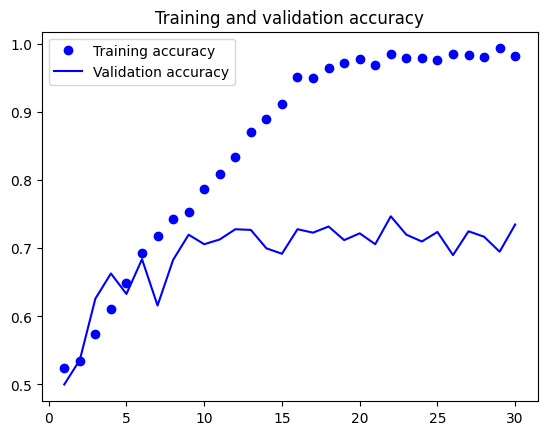

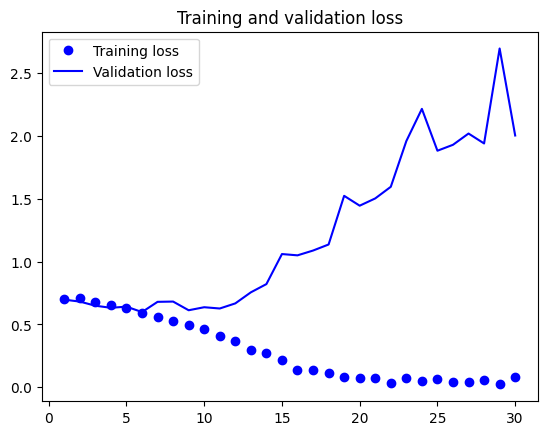

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Lets check the test accuracy , we will reload the model from its saved file to evaluate it as it was before it started overfitting

**Evaluating the model on the test data**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 37ms/step - loss: 0.5981 - accuracy: 0.6700
Test accuracy: 0.670


**Using data augmentation**

taked the approach of generating more training data from existing training samples by augmenting the samples via a number of random transformation that yield believable - looking images

The gaol is that at training time , your model will never see the exact same picture twice .
In keras , this is done by adding a number of data augmentation layer at the start of your model

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

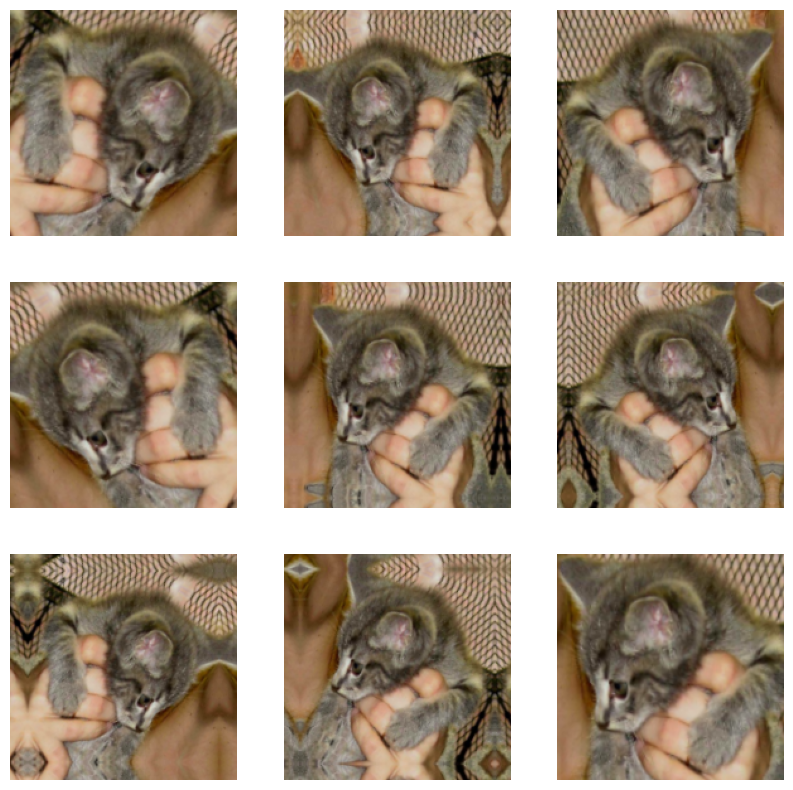

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Define a new convnet that includes images augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 7s 68ms/step - loss: 0.6989 - accuracy: 0.4885 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 4s 64ms/step - loss: 0.6939 - accuracy: 0.5105 - val_loss: 0.6911 - val_accuracy: 0.5730
Epoch 3/100
63/63 [==============================] - 5s 80ms/step - loss: 0.6881 - accuracy: 0.5665 - val_loss: 0.7001 - val_accuracy: 0.5030
Epoch 4/100
63/63 [==============================] - 4s 65ms/step - loss: 0.6686 - accuracy: 0.5925 - val_loss: 0.6907 - val_accuracy: 0.5120
Epoch 5/100
63/63 [==============================] - 5s 82ms/step - loss: 0.6674 - accuracy: 0.6195 - val_loss: 0.6335 - val_accuracy: 0.6270
Epoch 6/100
63/63 [==============================] - 4s 67ms/step - loss: 0.6272 - accuracy: 0.6455 - val_loss: 0.6277 - val_accuracy: 0.6450
Epoch 7/100
63/63 [==============================] - 4s 65ms/step - loss: 0.6133 - accuracy: 0.6570 - val_loss: 0.7575 - val_accuracy: 0.5970
Epoch 